In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Movie data files
imdb_metadata_path = "IMDb movies.csv"

# Read the movie data 
imdb_metadata = pd.read_csv(imdb_metadata_path, low_memory=False)

In [20]:
split_cols = imdb_metadata['genre'].str.split(',',expand=True)
split_cols_df = imdb_metadata.join(split_cols)
split_cols_df = split_cols_df.rename(columns ={0:"genres"})
split_cols_df = split_cols_df.drop(["genre", 1,2], axis = 1)
split_cols_df.head()


,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genres
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,45,USA,None,Alexander Black,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,Romance
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,70,Australia,None,Charles Tait,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,Biography
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,Drama
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,100,USA,English,Charles L. Gaskill,Victorien Sardou,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,Drama
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,Adventure


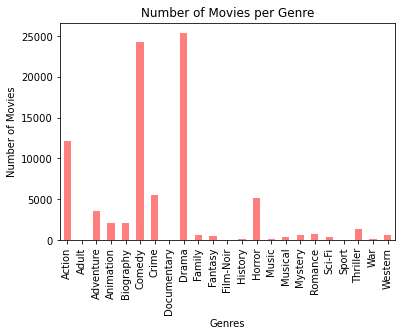

In [31]:
# Bar Chart for the number of movies per genre

split_cols_df_bar = split_cols_df.groupby('genres')['genres'].count().plot(kind='bar', alpha = 0.5, align = "center", color ="red")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")

# Save the figure
plt.savefig("Bar Chart of Number of Movies per Genre.png")
plt.show()


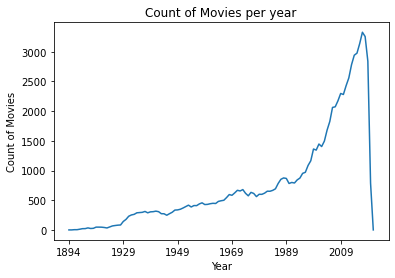

In [24]:
# Line Graph for number of movies produced per year

split_cols_df_line = split_cols_df.groupby('year')['title'].count().plot(kind = 'line')
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.title("Count of Movies per year")
# Save the figure
plt.savefig("Line Graph for number of movies produced per year.png")
plt.show()

In [25]:
top_five_df = split_cols_df.loc[split_cols_df['genres'].isin(['Drama','Action','Comedy','Crime','Horror'])].dropna()
top_five_df.head()

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genres
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",...,In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,Drama
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,87,USA,English,Charles Chaplin,Charles Chaplin,...,"With the aid of a wealthy erratic tippler, a d...",8.5,162668,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0,Comedy
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,87,USA,English,Charles Chaplin,Charles Chaplin,...,The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,Comedy
2795,tt0029453,Il bandito della Casbah,Pépé le Moko,1937,1937-10-22,94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",...,A wanted gangster is both king and prisoner of...,7.7,6180,$ 60000,$ 155895,$ 155895,98.0,46.0,55.0,Crime
3266,tt0031381,Via col vento,Gone with the Wind,1939,1949-03-12,238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",...,A manipulative woman and a roguish man conduct...,8.1,283975,$ 3977000,$ 200852579,$ 402352579,97.0,881.0,197.0,Drama


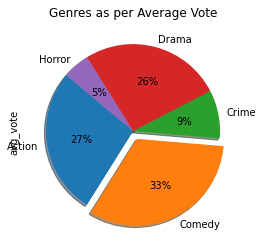

In [26]:
# Pie Chart is for  average votes as per Genre

explode = (0, 0.1, 0, 0, 0)
pie_chart_data = top_five_df.groupby('genres')['avg_vote'].sum().plot(kind = "pie", autopct="%1.0f%%", explode=explode, shadow=True, startangle=140)
pie_chart_data
plt.title("Genres as per Average Vote")

# Save the figure
plt.savefig("Pie Chart is for  average votes as per Genre.png")
plt.show()


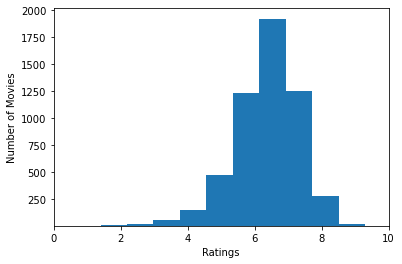

In [28]:
# Histogram Ratings as per the nymber of movies

plt.hist(top_five_df.avg_vote)
plt.ylim(2)
plt.xlim(0, 10)
plt.xlabel("Ratings")
plt.ylabel("Number of Movies")

# Save the figure
plt.savefig("Histogram Ratings as per the nymber of movies.png")
plt.show()

Drama
‾‾‾‾‾‾‾‾‾
The lower quartile of ratings  is: 6.15
The upper quartile of ratings is: 7.25
The interquartile range of ratings is: 1.0999999999999996
The the median of ratings is: 6.7 
Values below 4.500000000000001 could be outliers.
Values above 8.899999999999999 could be outliers.

Action
‾‾‾‾‾‾‾‾‾
The lower quartile of ratings  is: 6.0
The upper quartile of ratings is: 6.7
The interquartile range of ratings is: 0.7000000000000002
The the median of ratings is: 6.4 
Values below 4.949999999999999 could be outliers.
Values above 7.75 could be outliers.

Comedy
‾‾‾‾‾‾‾‾‾
The lower quartile of ratings  is: 5.5
The upper quartile of ratings is: 6.9
The interquartile range of ratings is: 1.4000000000000004
The the median of ratings is: 6.4 
Values below 3.3999999999999995 could be outliers.
Values above 9.0 could be outliers.

Crime
‾‾‾‾‾‾‾‾‾
The lower quartile of ratings  is: 6.8
The upper quartile of ratings is: 7.4
The interquartile range of ratings is: 0.6000000000000005
The the me

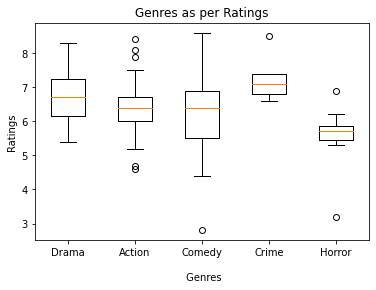

In [29]:

genres = ['Drama','Action','Comedy','Crime','Horror']
final = []
for row in genres:
    merge_df = top_five_df.loc[(top_five_df['genres'] == row) & (top_five_df['year'] == '2019')]
    values = merge_df['avg_vote']
    
    final.append(values)

#Calculate the IQR and Quantitatively determine if there are any potential outliers

    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{row}")
    print(f"‾‾‾‾‾‾‾‾‾")
    print(f"The lower quartile of ratings  is: {lowerq}")
    print(f"The upper quartile of ratings is: {upperq}")
    print(f"The interquartile range of ratings is: {iqr}")
    print(f"The the median of ratings is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")
    
    
plt.boxplot(final)
plt.xticks([1, 2, 3, 4, 5], genres)
plt.xlabel('\n Genres')
plt.ylabel('Ratings')
plt.title('Genres as per Ratings')

# Save the figure
plt.savefig("Box Plot of Genres as per Ratings.png")
plt.show()

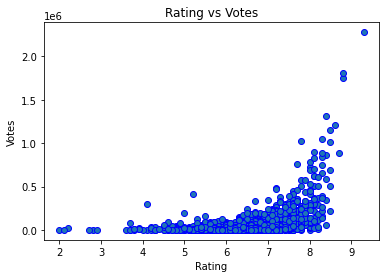

In [30]:
# Scatter Chart of ratings as per the votes

top_five_df_genre = top_five_df.loc[(top_five_df['genres'] == 'Drama')]
plt.scatter(top_five_df_genre['avg_vote'],top_five_df_genre['votes'], marker = "o", edgecolors = 'b')
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Rating vs Votes")

# Save the figure
plt.savefig("Scatter Chart of ratings as per the votes.png")
plt.show()